In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [3]:

def get_med_fn(L, T, repeat, shi=1.0, nm='sqT'):
    fname = "MED"
    fname += "_L" + str(L) 
    fname += "_T%.1f" % T
    fname += "_shi%.1f" % shi
    fname += "_sHi%.2f" % np.sqrt(T)
    fname += "_r%d" % repeat
    fname += "_" + nm + ".csv"
    return(fname)

def get_med_fn2(L, T, repeat, shi=1.0, nm='sqT'):
    fname = "MEDup"
    fname += "_L" + str(L) 
    fname += "_T%.1f" % T
    fname += "_shi%.1f" % shi
    fname += "_sHi%.2f" % np.sqrt(T)
    fname += "_r%d" % repeat
    fname += "_" + nm + ".csv"
    return(fname)


def get_spin_fn(L, T, repeat, shi=1.0, nm='H0'):
    fname = "spin"
    fname += "_L" + str(L) 
    fname += "_T%.1f" % T
    fname += "_shi%.1f" % shi
    fname += "_sHi%.2f" % np.sqrt(T)
    fname += "_r%d" % repeat
    fname += "_" + nm + ".csv"
    return(fname)

def get_spin_fn2(L, T, repeat, shi=1.0, nm='sqT'):
    fname = "spinup"
    fname += "_L" + str(L) 
    fname += "_T%.1f" % T
    fname += "_shi%.1f" % shi
    fname += "_sHi%.2f" % np.sqrt(T)
    fname += "_r%d" % repeat
    fname += "_" + nm + ".csv"
    return(fname)

In [20]:
def mag_plot(L, reps):
    Ts = [0.1, 0.5, 1.0, 2.0]
    plt.figure(1, figsize = (10,10))
    for i in range(len(Ts)):
        T = Ts[i]
        fname = '../data/' + get_med_fn(L, T, reps)
        med = pd.read_csv(fname, skiprows=1)
        plt.subplot(2, 2, i+1)
        plt.plot(med['mc_step'], med['mag'])
        plt.xlim([0,5000])
        #plt.ylim([-0.005, 0.005])
        if(i>1):
            plt.xlabel("MC steps", fontsize = 16)
        if(i%2==0):
            plt.ylabel("$<m>$", fontsize = 16)
        plt.title("Magnetization, T=%.1f" % (T), fontsize=16)
    #plt.savefig("mag_L%d.pdf" % L)

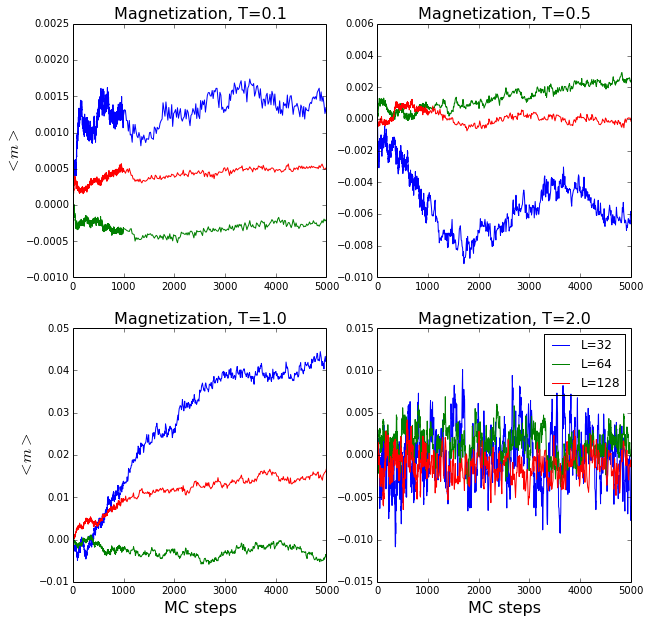

In [22]:
mag_plot(32, 1000)
mag_plot(64, 1000)
mag_plot(128, 200)
plt.legend(['L=32', "L=64", "L=128"])
plt.savefig('mag_2L128.pdf')
plt.savefig('mag_2L128.png')

In [3]:
def energy_plot(L, reps):
    Ts = [0.1, 0.5, 1.0, 2.0]
    plt.figure(1, figsize = (10,10))
    for i in range(len(Ts)):
        T = Ts[i]
        fname = '../data/' + get_med_fn(L, T, reps)
        med = pd.read_csv(fname, skiprows=1)
        plt.subplot(2, 2, i+1)
        plt.plot(med['mc_step'], med['energy'])
        plt.xlim([1,5000])
        #plt.ylim([1.8, 2.0])
        plt.autoscale(axis='y')
        if(i>1):
            plt.xlabel("MC steps", fontsize = 16)
        if(i%2==0):
            plt.ylabel("$<e>$", fontsize = 16)
        plt.title("Energy, T=%.1f" % (T), fontsize=16)
    #plt.savefig("mag_L%d.pdf" % L)

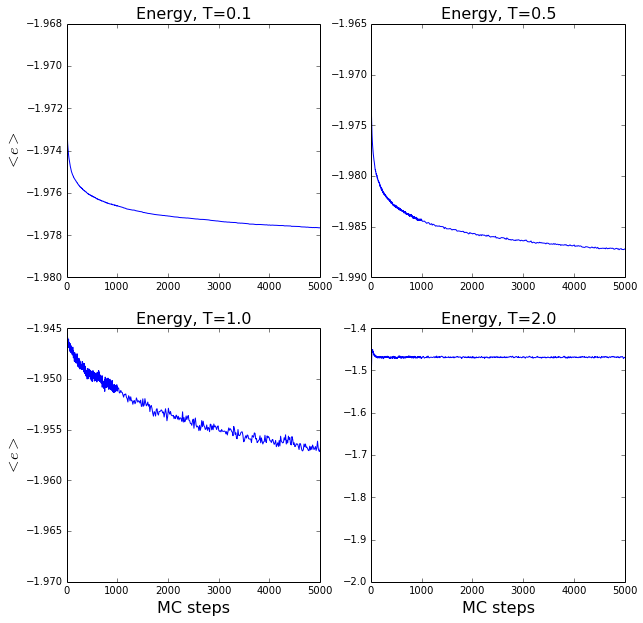

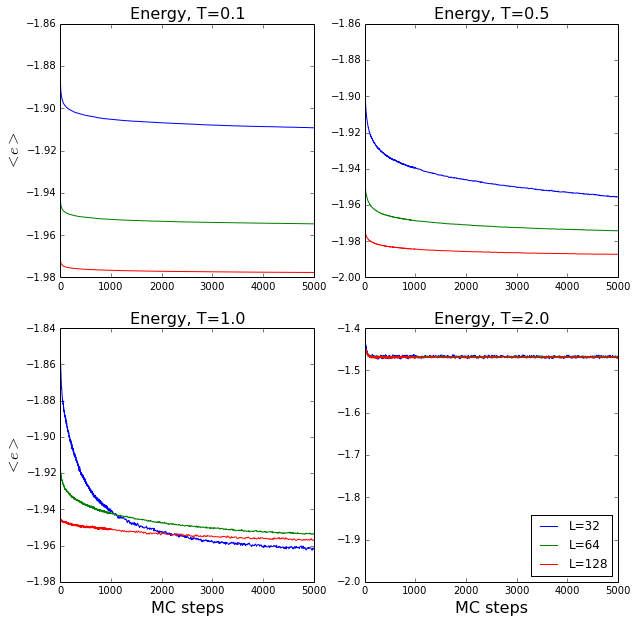

In [17]:
energy_plot(32, 1000)
energy_plot(64, 1000)
energy_plot(128, 200)
plt.legend(['L=32', "L=64", "L=128"], loc="lower right")
plt.savefig('energy_2L128.pdf')
plt.savefig('energy_2L128.png')

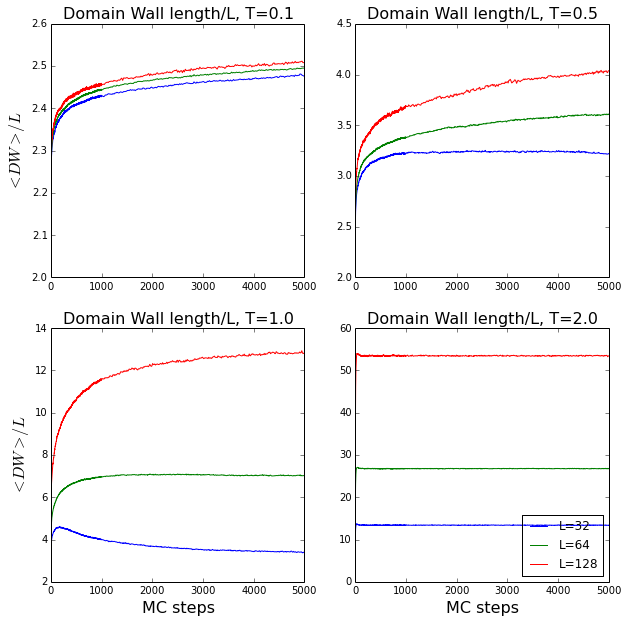

In [18]:
def domain_plot(L, reps):
    Ts = [0.1, 0.5, 1.0, 2.0]
    plt.figure(1, figsize = (10,10))
    for i in range(len(Ts)):
        T = Ts[i]
        fname = '../data/' + get_med_fn(L, T, reps)
        med = pd.read_csv(fname, skiprows=1)
        plt.subplot(2, 2, i+1)
        plt.plot(med['mc_step'], med['domain_len']/L)
        plt.xlim([1,5000])
        #plt.ylim([1.4, 2.0])
        plt.autoscale(axis='y')
        if(i>1):
            plt.xlabel("MC steps", fontsize = 16)
        if(i%2==0):
            plt.ylabel("$<DW>/L$", fontsize = 16)
        plt.title("Domain Wall length/L, T=%.1f" % (T), fontsize=16)
    #plt.savefig("mag_L%d.pdf" % L)
domain_plot(32, 1000)
domain_plot(64, 1000)
domain_plot(128, 200)
plt.legend(['L=32', "L=64", "L=128"],loc='lower right')
plt.savefig('domain_2L128.pdf')
plt.savefig("domain_2L128.png")

In [3]:
def spin_plot(L, reps):
    Ts = [0.1, 0.5, 1.0, 2.0]
    ind = [10, 14, 19, -1]
    plt.figure(1, figsize = (16,16))
    for i in range(len(Ts)):
        T = Ts[i]
        fname = '../data/' + get_spin_fn(L, T, reps)
        spin = np.loadtxt(fname,delimiter=",")
        for j in range(len(ind)):
            sp = spin[ind[j],1:]
            m = int(np.sqrt(len(sp)))
            sp = sp.reshape(m, m)
            #print [len(Ts), len(ind), i*len(ind)+j+1]
            plt.subplot(len(Ts), len(ind), i*len(ind)+j+1)
            plt.imshow(sp)
            plt.title("L=%d, T=%.1f, step=%.0f" % (L, T, spin[ind[j],0]), fontsize=14)

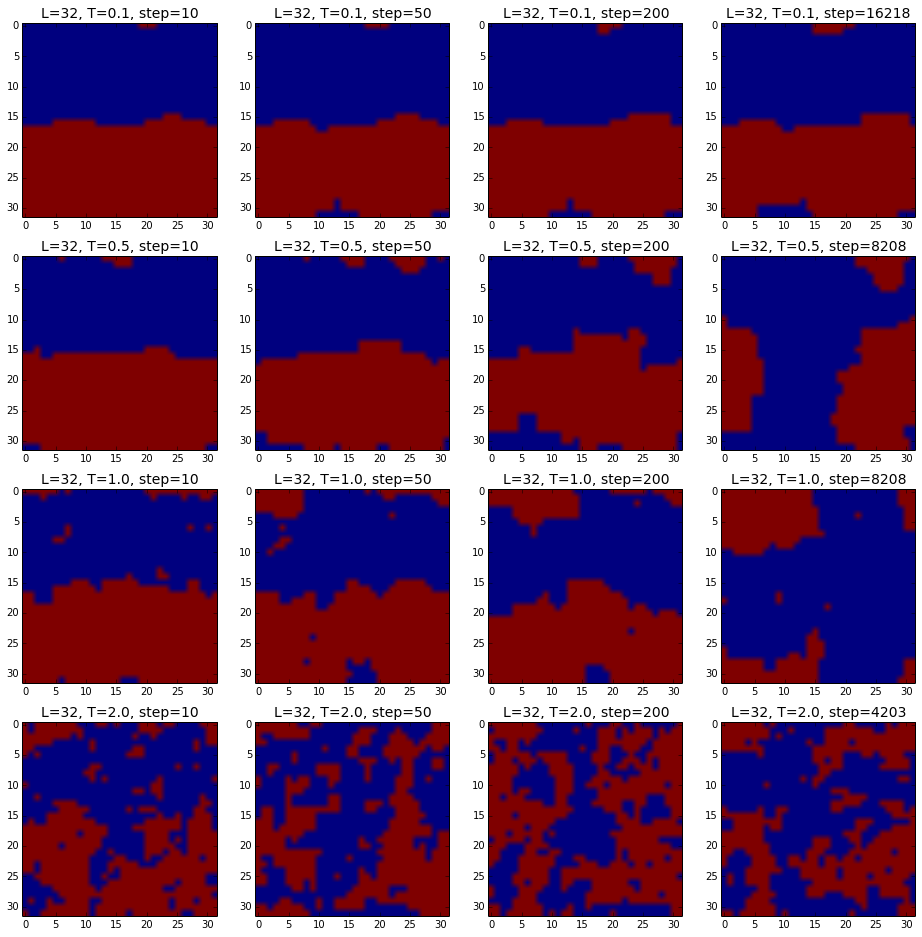

In [8]:
spin_plot(32, 1000)
plt.savefig("spin_L%d.pdf" % 32)

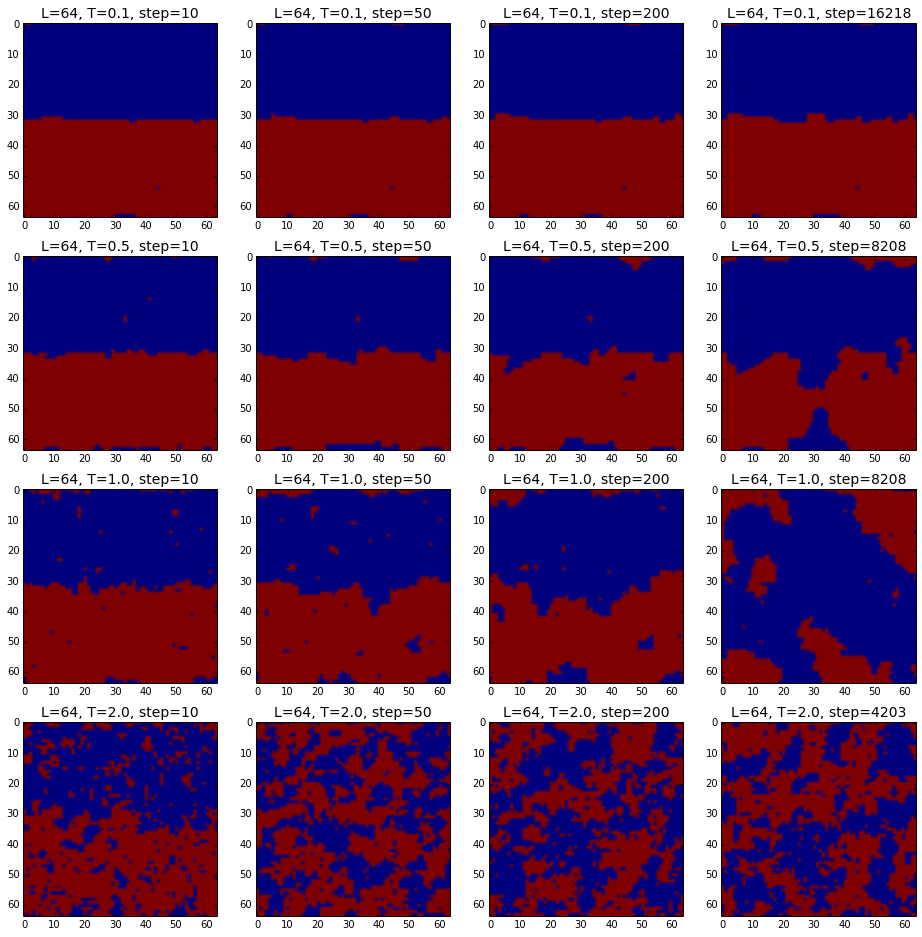

In [9]:
spin_plot(64, 1000)
plt.savefig("spin_L%d.pdf" % 64)

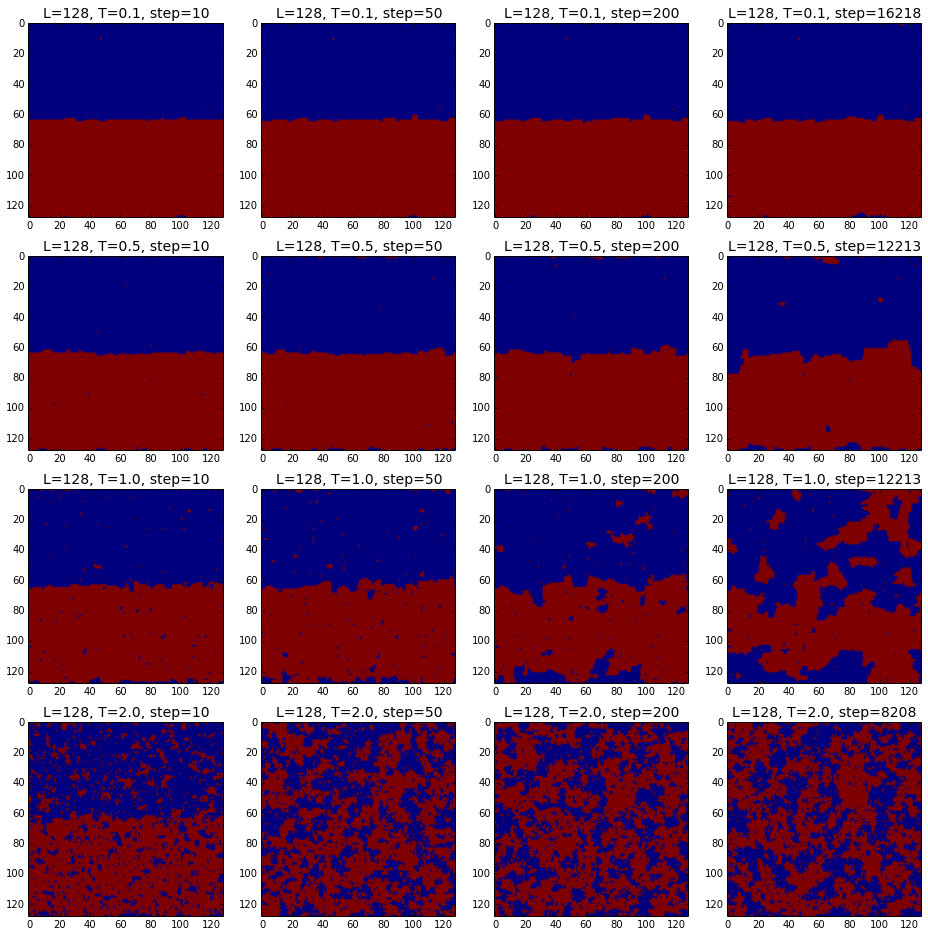

In [19]:
spin_plot(128, 200)
plt.savefig("spin_L%d.pdf" % 128)
plt.savefig("spin_L%d.png" % 128)

In [17]:
def spin_plot2(L, reps):
    Ts = [0.1, 0.5, 1.0]
    ind = [10, 14, 20, -1]
    plt.figure(1, figsize = (16,12))
    for i in range(len(Ts)):
        T = Ts[i]
        fname = '../data/' + get_spin_fn(L, T, reps)
        spin = np.loadtxt(fname,delimiter=",")
        for j in range(len(ind)):
            sp = spin[ind[j],1:]
            m = int(np.sqrt(len(sp)))
            sp = sp.reshape(m, m)
            #print [len(Ts), len(ind), i*len(ind)+j+1]
            plt.subplot(len(Ts), len(ind), i*len(ind)+j+1)
            plt.imshow(sp, interpolation='none', vmin=-1, vmax=1)
            plt.title("L=%d, T=%.1f, step=%.0f" % (L, T, spin[ind[j],0]), fontsize=14)

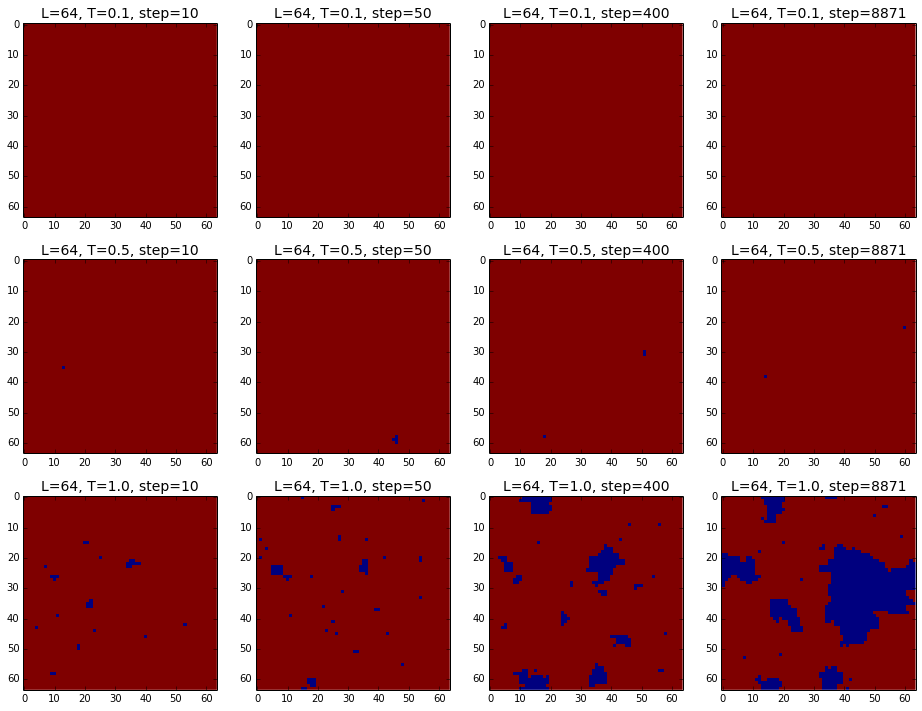

In [31]:
spin_plot2(64, 500)
plt.savefig("Spin_config_allups.pdf")

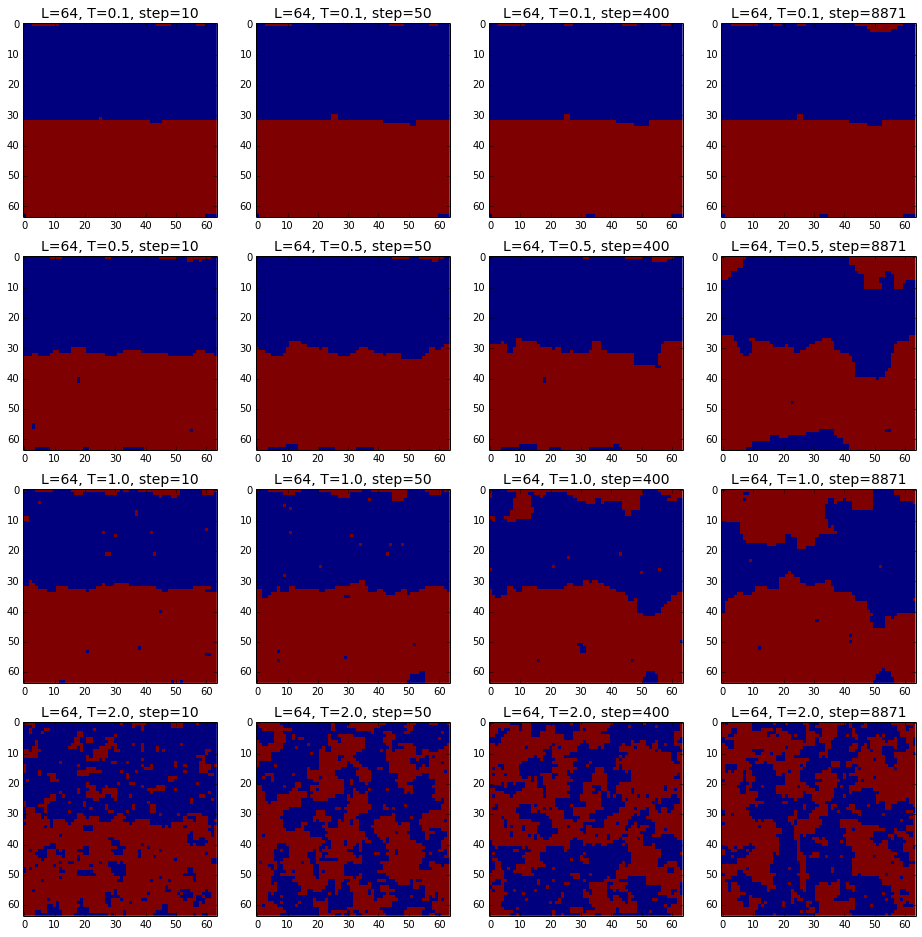

In [11]:
spin_plot2(64, 500)
plt.savefig("Spin_config_L64_noLangvin.pdf")

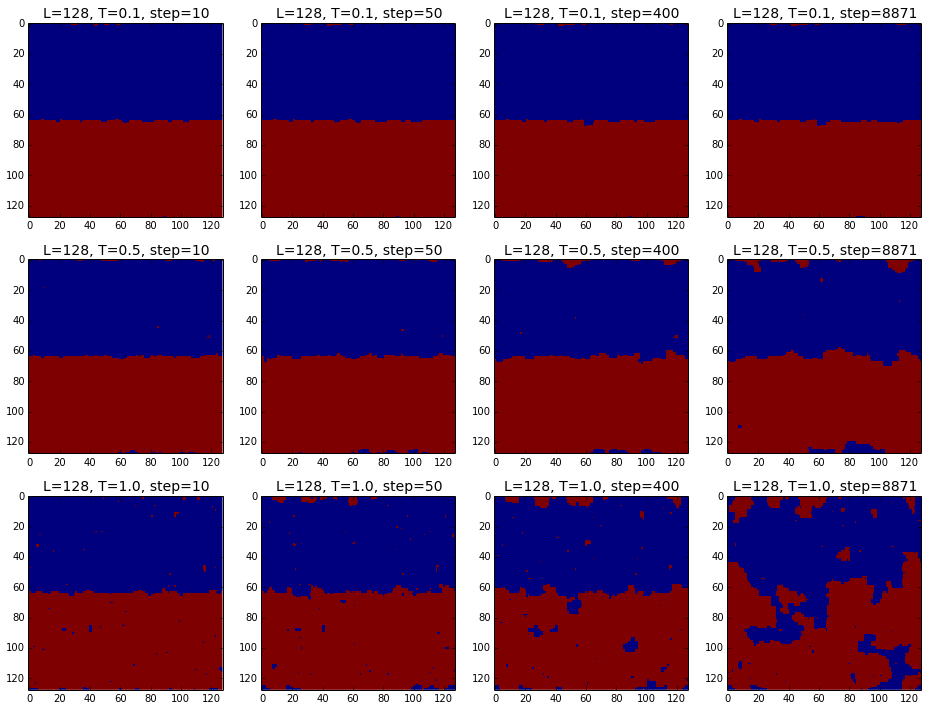

In [18]:
spin_plot2(128, 200)
plt.savefig("Spin_config_L128_noLangvin.pdf")